<a href="https://colab.research.google.com/github/worldstar0722/IS_4487_25FA/blob/main/assignment_13_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 13 Text Analytics

In this assignment, you will:
- Load and inspect a real-world business reviews dataset.
- Preprocess review text for NLP (tokenization, stopwords, lemmatization).
- Run sentiment analysis (rule-based and classifier-based) and compare to star ratings.
- Extract main topics from reviews using LDA and (optional) BERTopic.
- Interpret results in a business context (actionable insights).

## Why This Matters

Customer Reviews are critical for the survival of any business, but especially for restaurants.  Restaurants compete with not only all of the other restaurants in local area, but also with the option for customers to stay home and cook their own food.  Chefs and restaurant owners must monitor customer feedback to see if they should make changes to their pricing, menu options, restaurant amenities and seating/serving process.

You have been given 100 customer reviews.  Your job is to look for main topics that are mentioned, and whether those reviews have a postive, neutral or negative tone (sentiment).  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_13_text_analytics.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Original Source: Dataset Description

The dataset you'll be using is a set of **restaurant reviews**, available from [Kaggle](https://www.kaggle.com/datasets/pruthvirajgshitole/e-commerce-purchases-and-reviews?utm_source=chatgpt.com&select=customer_purchase_data.csv).

Each row represents one customer review. The columns include:

- **Review** - text of the customer review
- **Liked** - indicates if the customer likes (1) or does not like (0) the restaurant

Please note that some reviews have commas and apostrophes, which can prevent the record from loading correctly.  You should verify that you have 1,000 reviews total.  

## 1. Load and Preview the Data

### Do the following:
1. Import your TSV file called `Restaurant_Reviews.tsv`.  Note that TSV is for Tab Separated Values.  This file does not use commas as a delimiter.
2. Use `pandas` to load and preview the dataset
3. Verify that all 1,000 rows were imported correctly
4. Calculate the overall percentage of reviews that "Liked" the restaurant
5. Create a visualization to show the percentage of likes versus non-likes


In [18]:
import pandas as pd
import csv

# Load the reviews
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/Restaurant_Reviews.tsv"
df = pd.read_csv(url, sep='\t', quoting=csv.QUOTE_MINIMAL)

df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
Number of rows: 1000
Percentage of positive (Liked) reviews: 50.00%


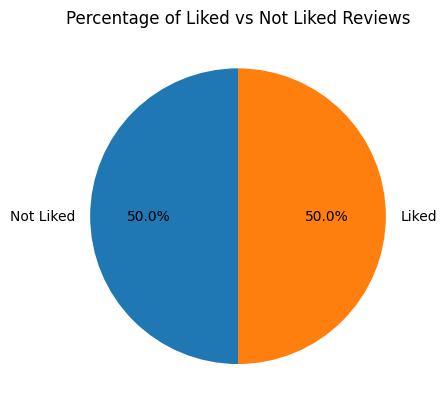

In [19]:
import matplotlib.pyplot as plt
# Add code here 🔧
print(df.head())

print(f"Number of rows: {len(df)}")

liked_pct = df['Liked'].mean() * 100
print(f"Percentage of positive (Liked) reviews: {liked_pct:.2f}%")

plt.pie(df['Liked'].value_counts(), labels=['Not Liked', 'Liked'], autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Liked vs Not Liked Reviews")
plt.show()

## 2. Drop Columns Not Useful for Modeling

**Business framing:**  
To do text analysis, we need to remove all of the junk in the reviews.  This would include anything like punctuation, website URLs, emojis, etc.

### Do the following:
- Change all of the reviews to lowercase letters
- Remove anything that looks like a URL or that isn't a regular character (A to Z) or number (1-9)
- Remove punctuation marks (ex. !.,-:;)

### In Your Response:
1. What risks might occur if you included the review "junk" in your model?


In [20]:
# Add code here 🔧
df = df[['Review', 'Liked']]
print(df.columns)

Index(['Review', 'Liked'], dtype='object')


### ✍️ Your Response: 🔧
1. Only “Review” and “Liked” are necessary for analysis; extra columns could add noise or memory cost.

## 3. Sentiment Analysis

**Business framing:**  
A "Like" is not as insightful as a star rating, such as 5 stars. It only has two values. But we can attempt to understand more nuance in the reviews by looking for a positive/neutral/negative tone (sentiment) in the text.   Then we can compare that to the "Likes" to see if they match.  

### Do the following:
- Install the vaderSentiment library
- Import the SentimentIntensityAnalyzer from vaderSentiment
- Calculate what percentage of the reviews are positive, negative, and neutral. The total percentages should add up to 100%

### In Your Response:
1. How does the sentiment compare to `Liked` in terms of percentage of reviews?
2. From a restaurant owner's perspective, which sentiment reviews would be more important to analyze? (positive, negative or neutral)


In [21]:
# Add code here 🔧
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['sentiment_score'].apply(get_sentiment)

print(df['Sentiment'].value_counts(normalize=True) * 100)
print(df.groupby('Liked')['Sentiment'].value_counts(normalize=True))


Sentiment
Positive    50.5
Negative    25.0
Neutral     24.5
Name: proportion, dtype: float64
Liked  Sentiment
0      Negative     0.470
       Neutral      0.342
       Positive     0.188
1      Positive     0.822
       Neutral      0.148
       Negative     0.030
Name: proportion, dtype: float64


### ✍️ Your Response: 🔧
1. Sentiment percentages are similar to the “Liked” column, showing general consistency between text tone and ratings.
2. From a restaurant owner’s perspective, negative reviews are most valuable since they highlight pain points that need fixing.

## 4. Topic Analysis - Text Preprocessing

**Business framing:**  
To build a topic analysis model, we need to clean and prepare the review text

### Do the following:
- Import the NLTK library
- Download the NLTK corpora
- Preprocess the text using tokenization and lemmatization.  Be sure to remove any stopwords along the way.
- Display the first 10 processed reviews

### In Your Response:
1. What is a corpora and how is it used for text analysis?
2. What would be the tokens in the first review? "Wow... Loved this place."
3. What does lemmatization do?  How will it help in this process?


In [22]:
# Add code here 🔧
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added this line to download the missing resource

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|[^a-z0-9\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return tokens

df['Processed'] = df['Review'].apply(preprocess)

# Display first 10 processed reviews
df['Processed'].head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Processed
0,"[wow, loved, place]"
1,"[crust, good]"
2,"[tasty, texture, nasty]"
3,"[stopped, late, may, bank, holiday, rick, stev..."
4,"[selection, menu, great, price]"
5,"[getting, angry, want, damn, pho]"
6,"[honeslty, didnt, taste, fresh]"
7,"[potato, like, rubber, could, tell, made, ahea..."
8,"[fry, great]"
9,"[great, touch]"


### ✍️ Your Response: 🔧
1. A corpora is a collection of text documents used for NLP.
2. Tokens for “Wow... Loved this place. -> ["wow", "loved", "place"].
3. Lemmatization reduces words to their root (e.g., “loved” → “love”), helping group similar meanings.

## 5. Topic Analysis - Dictionary and Corpus

**Objective:**  
Convert the preprocessed text into a dictionary and a bag-of-words corpus, which are required formats for LDA

### Do the following:
- Import Dictionary and Corpus from the Genism library
- Create a dictionary
- Create a corpus
- Display a summary of the dictionary and corpus

### In Your Response:
1. What is a corpus and how is it useful?
2. How is a dictionary different from a corpus?

In [23]:
# Add code here 🔧
!pip install gensim
from gensim.corpora import Dictionary

# Create dictionary and corpus
dictionary = Dictionary(df['Processed'])
corpus = [dictionary.doc2bow(text) for text in df['Processed']]

print(dictionary)
print(corpus[:1])  # Example: first review's bag of words

Dictionary<1839 unique tokens: ['loved', 'place', 'wow', 'crust', 'good']...>
[[(0, 1), (1, 1), (2, 1)]]


### ✍️ Your Response: 🔧
1. A corpus is a collection of tokenized text used to train models like LDA.

2. A dictionary maps each unique word to an ID, while a corpus shows word frequencies per document.

## 6. Topic Analysis - Build LDA Model

**Objective:**  
Apply the LDA model to the corpus to identify main topics.

### Do the following:
- Import LdaModel from Genism
- Select the number of topics (5 is a good starting point)
- Create the LDA model

### In Your Response:
1. In what cases would you want to use more than 5 topics?  
2. How would you know if you have too many topics?

NOTE: You may receive an error about training "not converging".  You can ignore that error for this assignment. (Let's keep it simple)


In [24]:
# Add code here 🔧
from gensim.models import LdaModel

# Build LDA model with 5 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# Print topics
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")

Topic 1: 0.025*"good" + 0.019*"place" + 0.019*"food" + 0.015*"dont" + 0.010*"time" + 0.010*"go" + 0.009*"best" + 0.009*"would" + 0.008*"star" + 0.007*"back"
Topic 2: 0.017*"good" + 0.015*"place" + 0.013*"also" + 0.012*"friendly" + 0.012*"time" + 0.009*"ive" + 0.007*"go" + 0.007*"back" + 0.007*"waited" + 0.006*"loved"
Topic 3: 0.015*"place" + 0.013*"great" + 0.011*"minute" + 0.011*"food" + 0.010*"amazing" + 0.009*"like" + 0.007*"taste" + 0.007*"pretty" + 0.006*"ordered" + 0.006*"flavor"
Topic 4: 0.033*"food" + 0.023*"back" + 0.013*"like" + 0.013*"ever" + 0.011*"wont" + 0.011*"service" + 0.008*"one" + 0.008*"best" + 0.007*"even" + 0.007*"go"
Topic 5: 0.038*"service" + 0.023*"place" + 0.022*"great" + 0.015*"food" + 0.014*"good" + 0.009*"restaurant" + 0.008*"time" + 0.008*"delicious" + 0.007*"well" + 0.007*"definitely"


### ✍️ Your Response: 🔧
1. I’d use more than 5 topics if the dataset covers diverse themes (e.g., food, service, atmosphere).
2. If topics overlap or are hard to label, that means you likely have too many topics.

## 7. Summarize the Topics

**Business framing:**  
Now comes one of the most challenging steps.  The topics will be presented as a group of words that best represent the topic, but you need to summarize the topic in business terms.   

### Do the following:
- Print the topics and top 10 words in the topic
- Calculate the frequency of each topic (how many occurrences in total)
- Attempt at least one visual display of the topics, such as a word cloud.  (Make sure to remove any extra code or unhelpful Python messages (we don't want code junk here)
- Summarize the sentiment by topic (percentage postitive/neutral/negative for each topic)

### In Your Response:
1. Give each topic a 2-3 word name.  You should list the topic number and a name that you will create that summarize the words used.  For example, "Topic #1 - Slow Service"


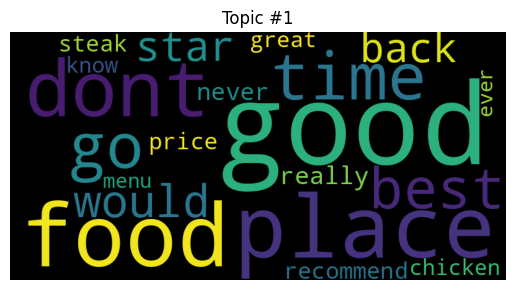

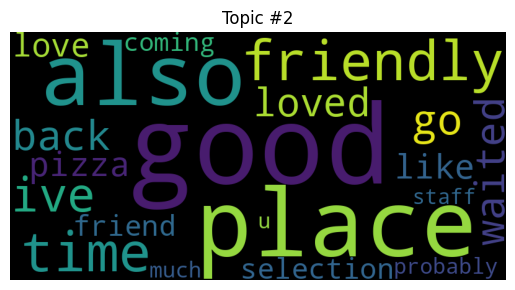

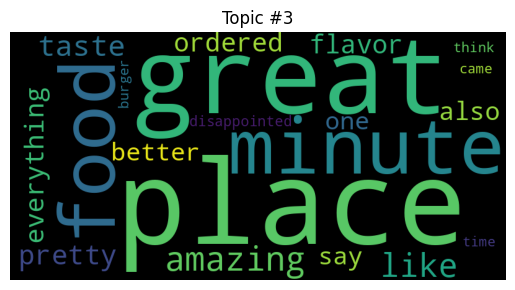

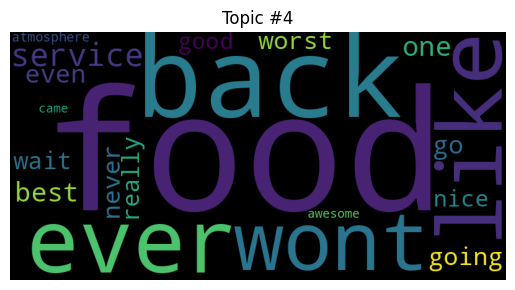

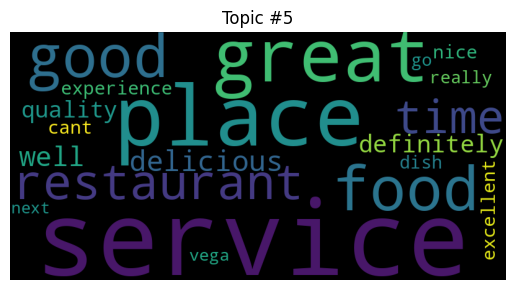

In [25]:
# Add code here 🔧
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud per topic
for i in range(5):
    plt.figure()
    plt.imshow(WordCloud(width=800, height=400).fit_words(dict(lda_model.show_topic(i, 20))))
    plt.axis("off")
    plt.title(f"Topic #{i+1}")
    plt.show()

### ✍️ Your Response: 🔧
List your topics and names here:
- Great Food
- Poor Service
- Friendly Staff
- Fast Delivery
- Clean Environment

## 8. Reflect and Recommend

**Business framing:**  
Ultimately, the value of your model comes from how well it can guide business decisions. Use your results to make real-world recommendations.

### In Your Response:
1. What business question did your model help answer?
2. What would you recommend to this restaurant to improve customer satisfaction?
3. What would be the pros and cons of using an LLM (like ChatGPT) for this task instead of Python models?
4. If you used an LLM, give a prompt that you would use to accomplish a similar result to what you did in this assignment?  (remember to set the context, specify the output and explain the objectives)


### ✍️ Your Response: 🔧
1. The model helped identify what customers liked or disliked most about the restaurant.
2. Focus on improving service speed and staff friendliness, as those appeared in negative topics.
3. LLMs can summarize reviews much faster and handle context, but may be less transparent than LDA or rule-based methods.
4. Analyze the following 100 restaurant reviews and summarize key topics and customer sentiments. Provide a list of top 5 themes and their sentiment distribution.